# Algorithmic Trading using Machine Learning

**MS** **in** **Applied** **Data** **Science,** **University** **of** **Southern** **California**

Here, I will be forecasting the Close price of Next few days using concept of moving window i.e taking few past days and predicting the next day's Close Price using Multivariate Time Series Forecasting. 


**MULTIVARIATE STOCK MARKET PRICE PREDICTION USING LSTM**

In [1]:
#Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("fivethirtyeight")
import pandas_datareader as pdr
import datetime as dt
from datetime import datetime

In [2]:
#Fetching the Stock Data
end=datetime.now()
start=datetime(end.year - 5, end.month, end.day)
stock_data=pdr.DataReader("CIDM", data_source="yahoo",start=start,end=end)
stock_data.shape

(1259, 6)

# Data Exploration

In [3]:
#Apple Stock Data 
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-02,2.2,1.8,1.8,2.0,53950.0,2.0
2016-05-03,2.1,2.0,2.1,2.1,26080.0,2.1
2016-05-04,2.7,2.0,2.2,2.7,186860.0,2.7
2016-05-05,2.7,2.2,2.7,2.2,65730.0,2.2
2016-05-06,2.2,2.1,2.2,2.1,14500.0,2.1


In [4]:
#Last 5 Days Stock Data
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-26,1.60,1.32,1.33,1.48,86135600.0,1.48
2021-04-27,1.58,1.41,1.48,1.52,72244800.0,1.52
2021-04-28,1.58,1.48,1.51,1.51,57315900.0,1.51
2021-04-29,1.55,1.44,1.52,1.48,54979100.0,1.48
2021-04-30,1.54,1.43,1.46,1.44,65764600.0,1.44


In [5]:
#Description of Stock Market Data
stock_data.describe

<bound method NDFrame.describe of             High   Low  Open  Close      Volume  Adj Close
Date                                                      
2016-05-02  2.20  1.80  1.80   2.00     53950.0       2.00
2016-05-03  2.10  2.00  2.10   2.10     26080.0       2.10
2016-05-04  2.70  2.00  2.20   2.70    186860.0       2.70
2016-05-05  2.70  2.20  2.70   2.20     65730.0       2.20
2016-05-06  2.20  2.10  2.20   2.10     14500.0       2.10
...          ...   ...   ...    ...         ...        ...
2021-04-26  1.60  1.32  1.33   1.48  86135600.0       1.48
2021-04-27  1.58  1.41  1.48   1.52  72244800.0       1.52
2021-04-28  1.58  1.48  1.51   1.51  57315900.0       1.51
2021-04-29  1.55  1.44  1.52   1.48  54979100.0       1.48
2021-04-30  1.54  1.43  1.46   1.44  65764600.0       1.44

[1259 rows x 6 columns]>

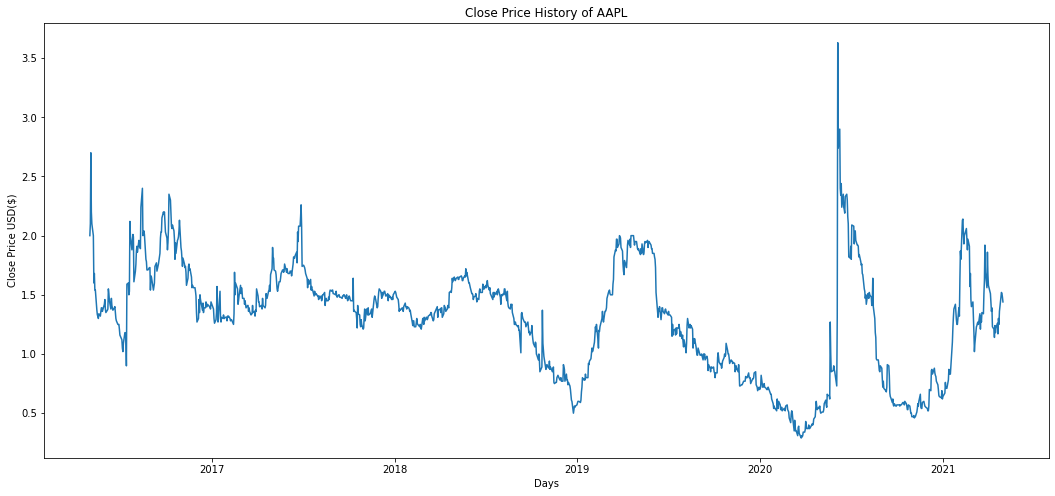

In [6]:
#Plotting the Close Price of the AAPL till today
plt.figure(figsize=(18,8))
plt.title("Close Price History of AAPL")
plt.plot(stock_data['Close'])
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.show()

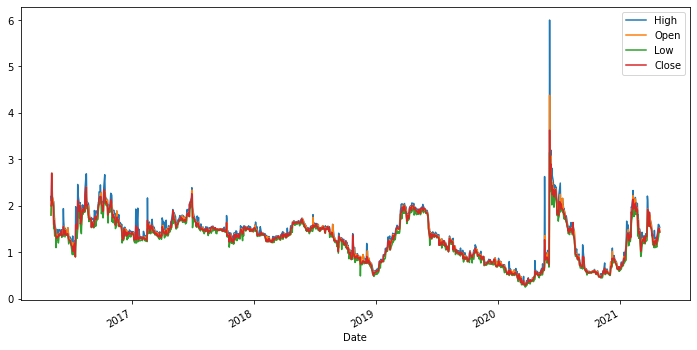

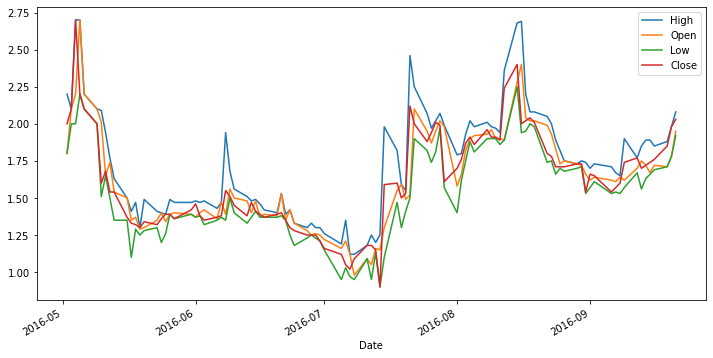

In [7]:
#Evolution of Few Features over time
features = ['High', 'Open', 'Low','Close']
plot_features = stock_data[features]
a=plot_features.plot(subplots=False, figsize=(12,6))

#Lets look at Trend in Few Data
plot_features2 = stock_data[features][:100]
b=plot_features2.plot(subplots=False, figsize=(12,6))

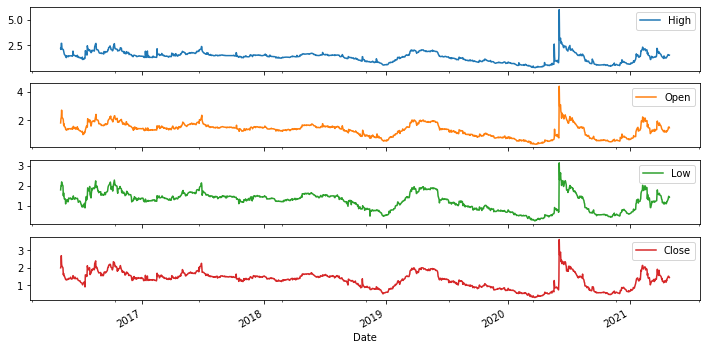

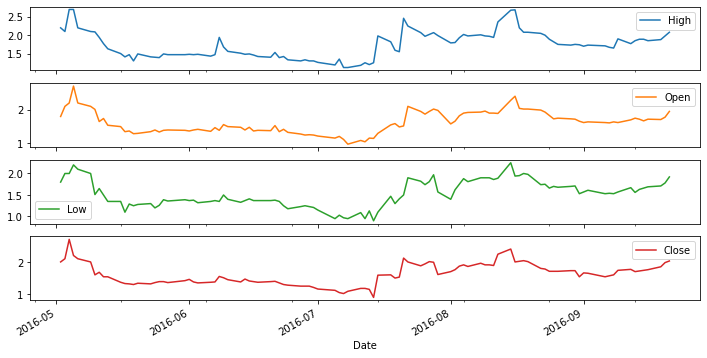

In [8]:
#Lets have a look at individual features
c = plot_features.plot(subplots=True, figsize=(12,6))
d= plot_features2.plot(subplots=True, figsize=(12,6))

**Auto Correlation Map**

 The autocorrelation function (ACF) measures how time series data is correlated with itself at different lags.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


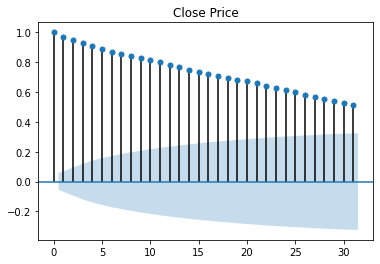

In [9]:
# Autocorrelation Map of Close Price
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data["Close"],lags=31,title="Close Price")
plt.show()


**Partial Auto Correlation Map**

The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

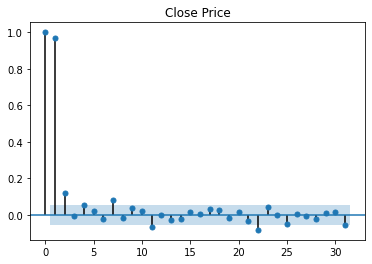

In [10]:
#Partial Auto Correlation Map for Close Price 
plot_pacf(stock_data["Close"],lags=31,title="Close Price") # Checking for 30,60,90,120 Days
plt.show()

Here, As the Time Step Increases from 1st day to 11th day the relation with the 1st data is decreasing .

**Trends and Seasonality**

Trend - To check consistent upwards or downwards slope of a time series

Seasonality - To see clear periodic pattern of a time series

In [11]:
#importing necessary libraries for plotting time series data trends
from pylab import rcParams
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm

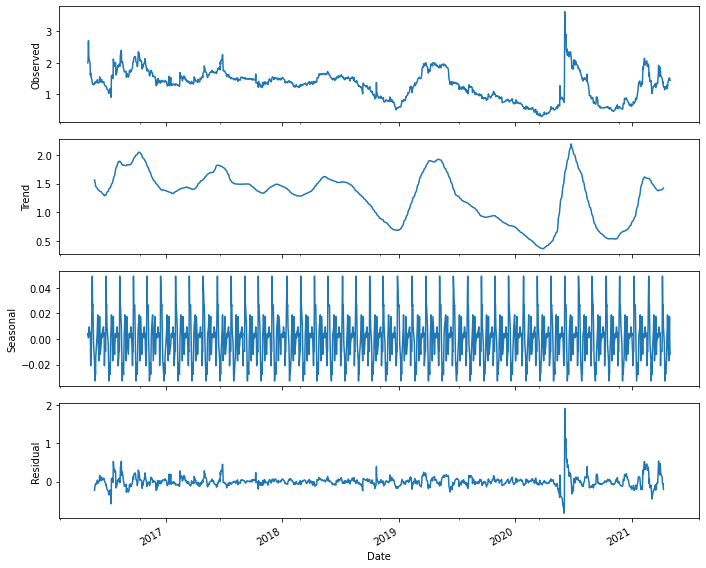

In [12]:
#Decomposing the data for checking Trend and Seasonality of Close price 
rcParams['figure.figsize'] = 10,8
close_trend = sm.tsa.seasonal_decompose(stock_data["Close"],freq=30) 
figure = close_trend.plot()
plt.show()

**Dickey-Fuller Test**

To Check wheather the time series data is stationary or not?

In [13]:
#Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
   
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

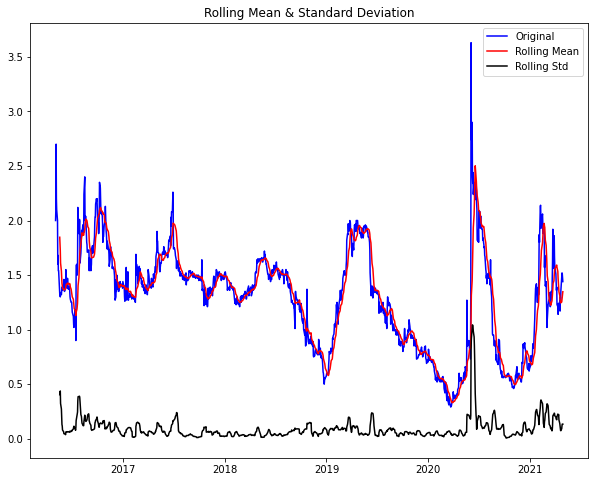

Results of Dickey-Fuller Test:
Test Statistic                   -3.280133
p-value                           0.015790
#Lags Used                       10.000000
Number of Observations Used    1248.000000
Critical Value (1%)              -3.435601
Critical Value (5%)              -2.863859
Critical Value (10%)             -2.568004
dtype: float64
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
#Checking Stationarity for Temperature Data
test_stationarity(stock_data["Close"])

# Data Preprocessing

In [15]:
#Features of Stock Data
stock_data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

**Feature Correlation Map**

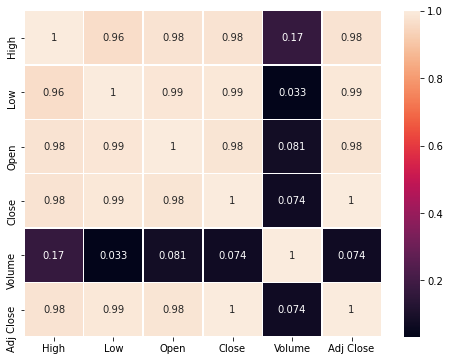

In [16]:
#Visualization of Correlation using Heat Map
import seaborn as sns
corrmat= stock_data.corr()
top_features=corrmat.index
plt.figure(figsize=(8,6))
g=sns.heatmap(stock_data[top_features].corr(), annot=True,linewidths=.5)

In [17]:
#First, we change the order of the features and we put the depedent variable at the star
features = ['Close', 'High',
       'Low', 'Open','Adj Close',"Volume"]

stock_data = stock_data.reindex(columns = features ) 
stock_data.head(1)

,Close,High,Low,Open,Adj Close,Volume
Date,,,,,,
2016-05-02,2.0,2.2,1.8,1.8,2.0,53950.0


**Select-K-Best Features**

In [18]:
#Importing Necessary Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [19]:
#Creating Select K-Best Function
def select_features(Xf_train, yf_train):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(Xf_train, yf_train)
    return fs

In [20]:
#Taking Features W.R.T 'Close Price'
K_features= select_features(stock_data[features[1:]],stock_data['Close'])

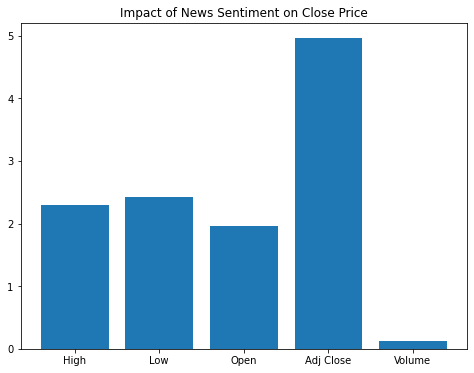

In [21]:
#Feature Importance Visualization
from matplotlib import pyplot
pyplot.figure(figsize=(8, 6))
pyplot.bar([i for i in features[1:]], K_features.scores_)
pyplot.title("Impact of News Sentiment on Close Price")
pyplot.show()

Dropping the Volume Features from Dataset as it has low correlations and importance w.r.t Close Price

In [22]:
#Splitting the data into dependent and independent features
X=stock_data.iloc[:,1:5]
#Predicting the Close price of data
y=stock_data.iloc[:,:1]

In [23]:
#Removing all commas and convert data to matrix shape format.
X = X.astype(str)
for i in X:
    for j in range(0, len(X)):
        X[i][j] = X[i][j].replace(',', '')

# Using multiple features (predictors)
stock_train = X.to_numpy()

print('Shape of Training set:{}.'.format(stock_train.shape))
stock_train

Shape of Training set:(1259, 4).


array([['2.200000047683716', '1.7999999523162842', '1.7999999523162842',
        '2.0'],
       ['2.0999999046325684', '2.0', '2.0999999046325684',
        '2.0999999046325684'],
       ['2.700000047683716', '2.0', '2.200000047683716',
        '2.700000047683716'],
       ...,
       ['1.5800000429153442', '1.4800000190734863', '1.5099999904632568',
        '1.5099999904632568'],
       ['1.5499999523162842', '1.440000057220459', '1.5199999809265137',
        '1.4800000190734863'],
       ['1.5399999618530273', '1.4299999475479126', '1.4600000381469727',
        '1.440000057220459']], dtype=object)

In [24]:
#Removing all commas and convert data to matrix shape format.
y = y.astype(str)
for i in y:
    for j in range(0, len(y)):
        y[i][j] = y[i][j].replace(',', '')

# Using multiple features (predictors)
stock_pred = y.to_numpy()

print('Shape of Training set:{}.'.format(stock_pred.shape))
stock_pred

Shape of Training set:(1259, 1).


array([['2.0'],
       ['2.0999999046325684'],
       ['2.700000047683716'],
       ...,
       ['1.5099999904632568'],
       ['1.4800000190734863'],
       ['1.440000057220459']], dtype=object)

**Feature** **Scaling**

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
stock_train=scale.fit_transform(stock_train)
print("Scaled Features:",stock_train)

Scaled Features: [[1.67942007 1.25885    1.06984108 1.53380177]
 [1.47869738 1.71004572 1.71432567 1.75140745]
 [2.6830321  1.71004572 1.92915421 3.05704309]
 ...
 [0.43494115 0.53693716 0.44683929 0.46753289]
 [0.37472425 0.44669812 0.46832209 0.40225118]
 [0.35465202 0.4241381  0.33942528 0.31520891]]


In [26]:
#Scaling the Prediction (Dependent Feature)
scalepred=StandardScaler()
stock_pred=scalepred.fit_transform(stock_pred)
print("Scaled Close Price:",stock_pred)

Scaled Close Price: [[1.53380177]
 [1.75140745]
 [3.05704309]
 ...
 [0.46753289]
 [0.40225118]
 [0.31520891]]


In [27]:
#Shape of the data
stock_train.shape , stock_pred.shape

((1259, 4), (1259, 1))

In [28]:
#Function to split the dataset into Training and Testing Data
def split_data(train_data,pred):
    tr_size=int((train_data.shape[0])*0.7)
    train_X = train_data[:tr_size]
    test_X = train_data[tr_size:]
    train_y = pred[:tr_size]
    test_y = pred[tr_size:]
    return train_X,test_X,train_y,test_y

In [29]:
#Train & Test Data
train_X,test_X,train_y,test_y = split_data(stock_train,stock_pred)

In [30]:
# split a multivariate sequence into samples
from numpy import array
def split(X_seq,y_seq, n_steps):
    X, y = list(), list()
    for i in range(len(X_seq)):
        end_ix = i + n_steps
        if end_ix > len(X_seq):
            break
        seq_x, seq_y = X_seq[i:end_ix], y_seq[end_ix-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [31]:
#Number of Past hours to make our model train 
time_stamp = 90  

In [32]:
#Splitting The Dataset into Train & Test
X_train,y_train= split(train_X, train_y, time_stamp)
X_test,y_test= split(test_X, test_y, time_stamp)

In [33]:
#Shape of Data
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((792, 90, 4), (289, 90, 4), (792, 1), (289, 1))

# Model Selection

In [34]:
pip install tensorflow-addons

     |████████████████████████████████| 706kB 6.0MB/s 


In [35]:
#Importing Necessary Libraries of Tensorflow for training LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,TensorBoard
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
import tensorflow as tf

In [36]:
#Training Sequential Model using 3 Hidden layers
model=Sequential()
model.add(LSTM(128,input_shape=(time_stamp,stock_train.shape[1]),return_sequences=True)) #66
model.add(LSTM(64,return_sequences=True)) #66
model.add(LSTM(32,return_sequences=False))

model.add(Dropout(0.25))
model.add(Dense(32))
model.add(Dense(1,activation='linear'))

#Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 128)           68096     
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 64)            49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 131,009
Trainable params: 131,009
Non-trainable params: 0
__________________________________________________

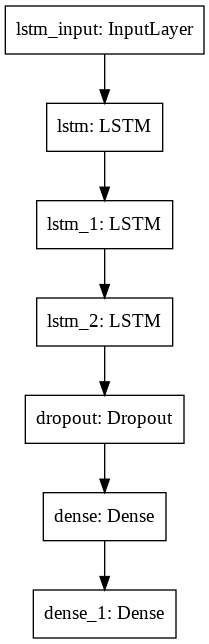

In [37]:
#Architecture of LSTM Model
tf.keras.utils.plot_model(model)

In [38]:

#Model Compilation (With Matrics including Macro and Micro F1 Score and AUC Score)
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=[
                       tf.keras.metrics.MeanAbsoluteError(),
                      ])

In [39]:
%%time
#Callbacks
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
es= EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1) #pat=10
#Model Fitting
lstm = model.fit(X_train, y_train,  
                    epochs=100, 
                    callbacks=[es],
                    validation_data=(X_test,y_test), 
                    verbose=2,
                    batch_size=128) #64

Epoch 1/100
7/7 - 11s - loss: 0.3166 - mean_absolute_error: 0.4273 - val_loss: 0.8773 - val_mean_absolute_error: 0.7101
Epoch 2/100
7/7 - 3s - loss: 0.1147 - mean_absolute_error: 0.2517 - val_loss: 0.6095 - val_mean_absolute_error: 0.5150
Epoch 3/100
7/7 - 3s - loss: 0.0792 - mean_absolute_error: 0.2084 - val_loss: 0.5620 - val_mean_absolute_error: 0.5733
Epoch 4/100
7/7 - 3s - loss: 0.0738 - mean_absolute_error: 0.1988 - val_loss: 0.4635 - val_mean_absolute_error: 0.4093
Epoch 5/100
7/7 - 3s - loss: 0.0636 - mean_absolute_error: 0.1871 - val_loss: 0.4371 - val_mean_absolute_error: 0.4489
Epoch 6/100
7/7 - 3s - loss: 0.0645 - mean_absolute_error: 0.1853 - val_loss: 0.3905 - val_mean_absolute_error: 0.3971
Epoch 7/100
7/7 - 3s - loss: 0.0622 - mean_absolute_error: 0.1780 - val_loss: 0.3804 - val_mean_absolute_error: 0.3990
Epoch 8/100
7/7 - 3s - loss: 0.0587 - mean_absolute_error: 0.1767 - val_loss: 0.3706 - val_mean_absolute_error: 0.3880
Epoch 9/100
7/7 - 3s - loss: 0.0545 - mean_abso

# Model Evaluation

**Traning and Validation Loss Graph**

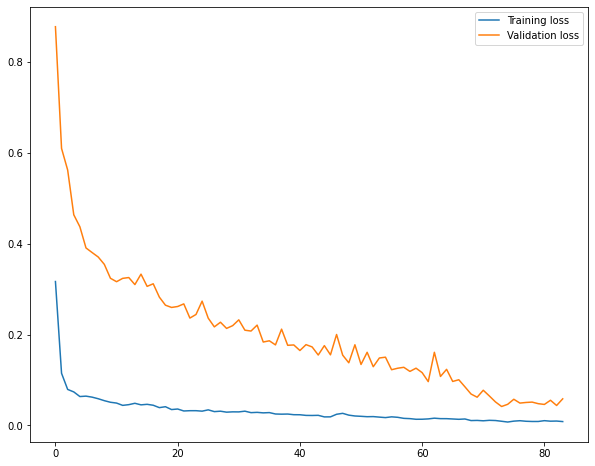

In [40]:
#Plotting Traning and Validation Loss of LSTM Architecture
plt.plot(lstm.history['loss'], label='Training loss')
plt.plot(lstm.history['val_loss'], label='Validation loss')
plt.legend()

In [41]:
# Perform predictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [42]:
#Perfoming Inverse Transformation to get original data
train_predict=scalepred.inverse_transform(train_predict)
test_predict=scalepred.inverse_transform(test_predict)

In [43]:
#Perfoming Inverse Transformation to get original Close Price data
y_test=scalepred.inverse_transform(y_test)
y_train=scalepred.inverse_transform(y_train)

In [78]:
#Test Prediction values
y_test.shape, test_predict.shape 

((289, 1), (289, 1))

In [79]:
#Predicted Values
test_predict

array([[0.521192  ],
       [0.5142737 ],
       [0.4830765 ],
       [0.47439998],
       [0.45607948],
       [0.4789343 ],
       [0.50326127],
       [0.47961426],
       [0.45969522],
       [0.43696094],
       [0.4346146 ],
       [0.43635505],
       [0.4466573 ],
       [0.46358556],
       [0.47435272],
       [0.4868657 ],
       [0.52401537],
       [0.5223411 ],
       [0.5051133 ],
       [0.4957922 ],
       [0.5039306 ],
       [0.50368613],
       [0.5045543 ],
       [0.5178579 ],
       [0.53308785],
       [0.5287672 ],
       [0.5288456 ],
       [0.54667836],
       [0.57322574],
       [0.64759713],
       [0.67998797],
       [0.65752923],
       [0.6376541 ],
       [0.6439045 ],
       [0.6410278 ],
       [0.64445597],
       [0.63197297],
       [0.61498994],
       [0.6113581 ],
       [0.614772  ],
       [0.6161649 ],
       [0.6260424 ],
       [0.65744597],
       [0.6941156 ],
       [0.66658986],
       [0.6488932 ],
       [0.7162482 ],
       [0.712

In [46]:
#Calculating Mean Absolute Error on Test Data
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(test_predict, y_test)
print("Mean Absolute Error on Test Data:",MAE)

MAE2 = mean_absolute_error(train_predict, y_train)
print("Mean Absolute Error on Train Data:",MAE2)

Mean Absolute Error on Test Data: 0.07148765177050263
Mean Absolute Error on Train Data: 0.026208356022834778


In [82]:
y_test.reshape(-1)

(289,)

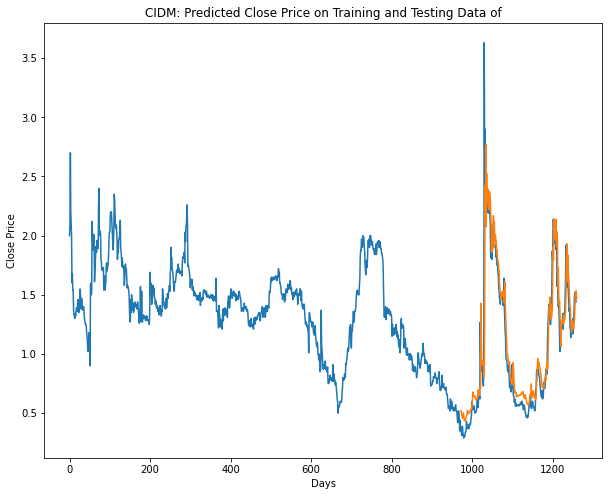

In [105]:
#Plotting The Forecasted Close Price
plt.plot(scalepred.inverse_transform(stock_pred))
plt.plot(range(len(y_train) + 2*time_stamp, len(y_train) + len(y_test) +2*time_stamp), test_predict)
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("CIDM: Predicted Close Price on Training and Testing Data of")
plt.show()


In Multivariate Time Series Forecasting, We can only Predict the single next day close price

In [107]:
#Forecasted 1 Next Day Close Price
nextday=test_predict[-1]
print("Next Day Forecasted Close Price:",nextday)

Next Day Forecasted Close Price: [1.4689659]
